In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
clustering_df = pd.read_csv("clustering.csv", header=None)

In [ ]:
clustering_df.columns = ["x", "y"]

In [ ]:
clustering_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       400 non-null    float64
 1   y       400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [ ]:
clustering_df.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


In [ ]:
#Wygląda na to, że jest to po prostu ramka danych zawierająca współrzędne pojedynczych punktów

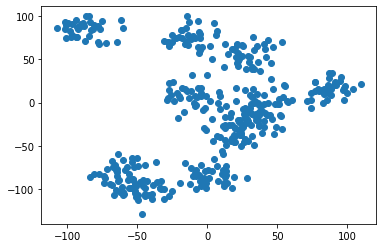

In [ ]:
plt.scatter(x = clustering_df['x'],y = clustering_df['y'])
plt.show()

In [ ]:
#Na scatterplocie widać potencjalne klastry. Postaramy się jednak tym nie sugerować, i dalsze rozważania przeprowadzimy "na ślepo".

### KMEANS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


#### Wyznaczanie liczby klastrów

In [ ]:
clusters = range(1,12)
scaler = StandardScaler()
inertias = []
for i in clusters:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(clustering_df)
  inertias.append(kmeans.inertia_)

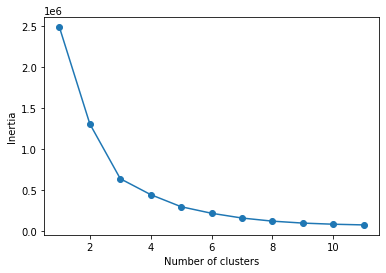

In [ ]:
plt.plot(clusters, inertias, '-o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
#Największy punkt przegięcia widać przy 3 klastrach.

In [ ]:
def draw_kmeans(df, n):
  kmeans = KMeans(n_clusters = n)
  kmeans.fit(df)
  labels = kmeans.predict(clustering_df)
  centroids = kmeans.cluster_centers_
  plt.scatter(x=clustering_df['x'], y=clustering_df['y'],c=labels)
  plt.scatter(x=centroids[:,0], y=centroids[:,1], marker='D', s=50, c="red")
  plt.title("Kmeans clusters, number of clusters: {}".format(n))
  plt.show()

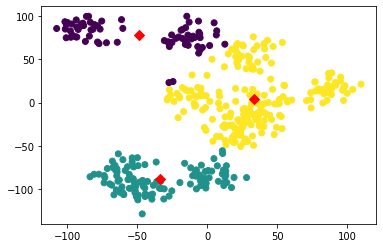

In [ ]:
draw_kmeans(clustering_df, 3)

In [ ]:
#Wybróbujmy jeszcze 6 klastrów

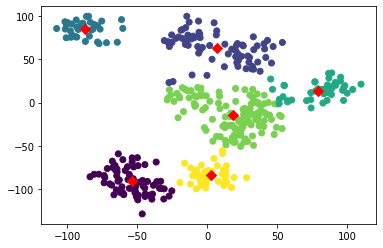

In [ ]:
draw_kmeans(clustering_df, 6)

### HIERARCHICAL

#### Wyznaczanie liczby klastrów

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
link = linkage(clustering_df, method='complete')

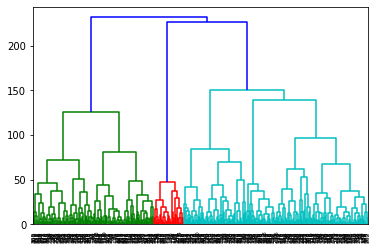

In [ ]:
dendrogram(link, 
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

In [ ]:
labels_h_3 = fcluster(link, 170, criterion='distance')

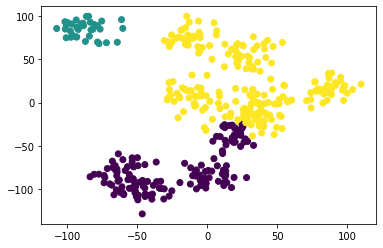

In [ ]:
plt.scatter(x=clustering_df['x'], y=clustering_df['y'],c=labels_h_3)
plt.title("Hierarchical clusters, number of clusters: {}".format(3))
plt.show()

In [ ]:
labels_h_6 = fcluster(link, 110, criterion='distance')

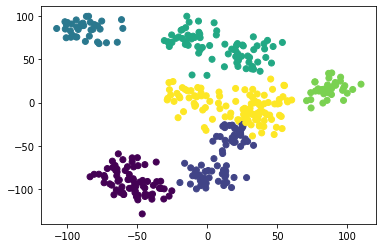

In [ ]:
plt.scatter(x=clustering_df['x'], y=clustering_df['y'],c=labels_h_6)
plt.title("Hierarchical clusters, number of clusters: {}".format(6))
plt.show()

Podsumowując, choć być może intuicyjnie (patrząc na wykresy) 6 klastrów wydaje się być lepszym podziałe, to jednak zarówno wykres "łokciowy" w metodzie k-średnich i dendrogram w metodzie hierarchicznej wskazują na 3 klastry.